# Introduction

Data source: https://www.kaggle.com/rtatman/blog-authorship-corpus


The dataset, which is a .csv file, contains 681,288 blog posts. It contains fields such as the age and gender of the authors. For this project, only the `text` and the `age` columns are of interest, as the primary goal is to train a model that can generate text after training on various sentences. In addition, we are interested to see the results if we separate the dataset according to different age groups and train individual models for them--we expect to see that the texts generated by these models will have different styles that reflect the age groups that they correspond to.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../Data/blogtext.csv')
display(data.head(3))

# As mentioned above, only the columns of "text" and "age"
# are of interest
data = data[['text','age']]

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...


Text(0.5, 1.0, 'Plot (1): Distribution of author ages')

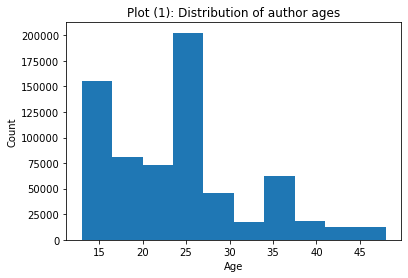

In [2]:
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Plot (1): Distribution of author ages")

As shown in Plot (1), the range of the authors' ages is from 13 to 48, with most of them being under age 30.

# Example texts from the dataset
In this part, texts written by people of different ages are displayed as examples.

In [3]:
print("Age:", data.iloc[91,1])
data.iloc[91,0]

Age: 14


'                 Death can be a scary thing. It only seems like that because we know so little about it. We don’t know when our decease will take place, or where for that matter, or what is after death, although there are many opinions. Everybody is different, so I can only speak for myself, but death to me is in fact daunting. I’m not really frightened of how I die, it doesn’t matter that much to me. I’m not apprehensive about what happens to me after death, I believe my God will take me to heaven. I’m afraid of when I will die. I’m afraid that when I die, the people who I know would never have heard what I had to tell them, especially my family. I’m afraid that I’d pass before I told them I loved them so much. I couldn’t imagine their lives after I died without having a clear conscience that I loved them. I’d think they would think of my last memory of them trying to remember if it was a positive memory. Nobody wants to be remembered pessimistically. I want them all to know that I a

In [4]:
print("Age:", data.iloc[501,1])
data.iloc[501,0]

Age: 27


"       There is the old cliche that music can change your mood in an instant.  Oftentimes, I am the cliche.  Driving in my car a song on the radio will put in the mood for shopping, reading a book, or dancing within the span of 8 minutes.  The emotional hills and valleys that I go through listening to music come up as quickly as the mileposts on the highway.  On Saturdays, when there is work to be done in my apartment, I open the blinds or windows, turn up the radio on an upbeat (usually hip hop) station and get busy.  Choosing one CD to listen during one period of productive time is more difficult.    I have a habit of listening to an album until it is worn out and tired.  I get a new album and listen to it over and over.  I've been known to put certain songs or even the whole CD on repeat for hours.  Because of this, I know every word to albums of bands like U2, Sarah Mclachlan, James, Harry Connick Jr., Billy Brag and Wilco, Michelle Shocked, David Wilcox, Jimmy Buffet, and show tu

In [5]:
print("Age:", data.iloc[201,1])
data.iloc[201,0]

Age: 37


"       Ok. Maybe that last entry was typed with rose colored glasses on... he is a very great guy, but I never get to see him that much. haven't seen him in two weeks, or talked to him in over 1 week... I really think we could be perfect, except I need somone I can do things with... My sister (the 'golden child') has a great man. She always has great guys...and always gets her way, and has a perfect house...blah, blah, blah.... not to mention she is 6'1', about 130 wringing wet, is very pretty and very classically feminine... she has it all, always has....ANYWAY... She and her boyfriend are constantly together, doing things with his kids, and working on his farm together... he is very respected, he is the undersheriff of our county. I seem to have a sign on my forehead that says 'Losers Welcome', because that is the only group of men who ever ask me out... *sigh* Not that Steven is a loser, by all means, but he is so busy in his life, and set in his ways, he doesn't think about taking

# Separation of datasets according to age groups
To see if individual models trained using blog posts of different age groups can output texts of different styles, the original dataset is separated into three main parts: one for people under age 20, one for people between age 20 and 30, and one for people above 30 years old.

In [6]:
under_20 = data.loc[data.age<20]['text']
bt_20and30 = data.loc[data.age>=20].loc[data.age<30]['text']
over_30 = data.loc[data.age>=30]['text']

In [7]:
print("Number of blog posts by people under 20 is:", under_20.shape[0])
print("Number of blog posts by people between 20 and 30 is:", 
      bt_20and30.shape[0])
print("Number of blog posts by people above 30 is:", over_30.shape[0])

Number of blog posts by people under 20 is: 235867
Number of blog posts by people between 20 and 30 is: 321447
Number of blog posts by people above 30 is: 123970


In [8]:
# Export datasets
under_20.to_csv('../Data/blog_under_20.csv', index=False)
bt_20and30.to_csv('../Data/blog_2030.csv', index=False)
over_30.to_csv('../Data/blog_over_30.csv', index=False)